Question 1: What is the difference between K-Means and Hierarchical Clustering? Provide a use case for each.

Answer: **Difference between K-Means and Hierarchical Clustering**

**K-Means Clustering**

* **How it works:** Partitions data into a predefined number of clusters (**K**) by minimizing the distance between data points and their cluster centroids.
* **Key characteristics:**

  * You must specify the number of clusters in advance.
  * Works best with large datasets.
  * Assumes clusters are roughly spherical and similar in size.
  * Fast and computationally efficient.
* **Use case:**
  *Customer segmentation* in marketing, where you already know how many customer groups you want (e.g., 5 customer types based on purchasing behavior).

**Hierarchical Clustering**

* **How it works:** Builds a hierarchy (tree-like structure called a **dendrogram**) of clusters by either progressively merging smaller clusters (agglomerative) or splitting larger ones (divisive).
* **Key characteristics:**

  * No need to predefine the number of clusters.
  * Produces a visual hierarchy of clusters.
  * Computationally more expensive for large datasets.
  * Flexible in cluster shape and size.
* **Use case:**
  *Biological taxonomy or gene expression analysis*, where understanding the relationships and hierarchy between groups is more important than fixing the number of clusters upfront.

Question 2: Explain the purpose of the Silhouette Score in evaluating clustering algorithms.

Answer: **Silhouette Score (Humanized Explanation)

The **Silhouette Score** helps you understand whether your clustering actually makes sense.

It looks at two simple ideas:

* How close a data point is to other points in the **same cluster**
* How far that point is from points in the **nearest other cluster**

Each data point gets a score between **–1 and 1**:

* A score close to **1** means the point clearly belongs where it is.
* A score around **0** means it’s kind of on the fence between clusters.
* A **negative** score suggests it might be in the wrong group.

**Why people use it:**

* To check if clusters are **well separated or overlapping**
* To decide the **best number of clusters**, especially in K-Means
* To compare different clustering results and pick the most meaningful one

Question 3: What are the core parameters of DBSCAN, and how do they influence the clustering process?

Answer: **Core Parameters of DBSCAN and Their Influence

DBSCAN groups data based on how **dense** the data points are, instead of forcing them into a fixed number of clusters. It mainly depends on two core parameters:

### 1. **eps (ε – epsilon)**

* This defines the **neighborhood radius** around a data point.
* Any points within this distance are considered neighbors.
* **Influence:**

  * If ε is **too small**, many points won’t have enough neighbors and will be labeled as noise.
  * If ε is **too large**, separate clusters may get merged into one big cluster.

### 2. **minPts (Minimum Points)**

* This is the minimum number of points required inside the ε radius to form a dense region.
* **Influence:**

  * A **higher minPts** makes the algorithm stricter, leading to fewer clusters and more noise.
  * A **lower minPts** allows smaller clusters but may also capture noise as clusters.

### How they work together

* A point becomes a **core point** if it has at least *minPts* neighbors within ε.
* Points close to core points become **border points**.
* Points that don’t meet either condition are marked as **noise**.

Question 4: Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?

Answer: **Why Feature Scaling Matters in Clustering**

Feature scaling is important because clustering algorithms like K-Means and DBSCAN rely heavily on distance calculations to group data points.

If features are on very different scales (for example, age ranging from 0–100 and income ranging from 1,000–1,000,000), the feature with the larger values will dominate the distance calculation.

**Impact on K-Means**

K-Means uses distance to assign points to the nearest centroid.

Without scaling, features with larger numeric ranges can skew the centroids, leading to misleading clusters.

Scaling ensures each feature contributes fairly to the clustering process.

**Impact on DBSCAN**

DBSCAN uses distance to determine neighborhood density.

Poorly scaled features can cause incorrect neighbor detection, leading to:

Too many points labeled as noise

Or unrelated points being grouped together

Question 5: What is the Elbow Method in K-Means clustering and how does it help determine the optimal number of clusters?

Answer: When using K-Means, one of the first challenges is deciding how many clusters (K) to use. The Elbow Method is a simple, visual way to help with that decision.

The idea is to run K-Means multiple times using different values of K and record the within-cluster sum of squares (WCSS) each time. WCSS measures how tightly packed the points are within each cluster. As K increases, WCSS naturally decreases because more clusters mean points are closer to their centroids.

At first, adding more clusters leads to a big improvement. But after a certain point, the improvement becomes much smaller. When you plot K against WCSS, this change in rate often looks like a bent arm — the “elbow.”

That elbow point represents a good balance:

Before it: clusters are too broad

After it: extra clusters add little real value

So, the Elbow Method helps identify a K that captures the structure of the data without overcomplicating the model.


**Dataset**
**Use make_blobs, make_moons, and sklearn.datasets.load_wine() as
specified.**

Question 6: Generate synthetic data using make_blobs(n_samples=300, centers=4), apply KMeans clustering, and visualize the results with cluster centers.

Answer: Step-by-step explanation

make_blobs creates synthetic data with clear cluster structure.

KMeans groups the data into 4 clusters.

A scatter plot shows:

Data points colored by cluster

Cluster centers highlighted for clarity



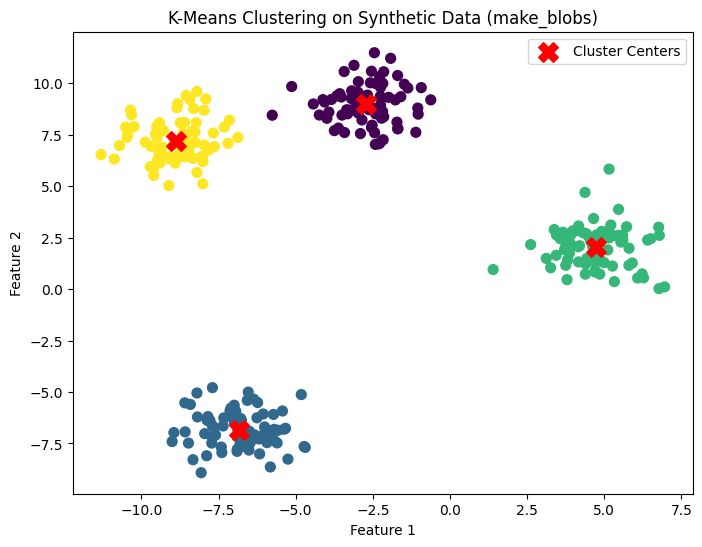

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

# Visualize the clustering results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centers[:, 0], centers[:, 1],
            c='red', marker='X', s=200, label='Cluster Centers')

plt.title("K-Means Clustering on Synthetic Data (make_blobs)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


**What this shows**

1) Each color represents a different cluster

2) Red X marks show the K-Means centroids

3) The clusters are well separated, which is ideal for K-Means

Question 7: Load the Wine dataset, apply StandardScaler , and then train a DBSCAN model. Print the number of clusters found (excluding noise).

Answer: **What the code does**

Loads the Wine dataset

Scales the features using StandardScaler

Applies DBSCAN

Counts the number of clusters excluding noise points


In [2]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Load the Wine dataset
wine = load_wine()
X = wine.data

# Apply StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train DBSCAN model
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Count number of clusters (excluding noise)
unique_labels = set(labels)
num_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)

print("Number of clusters found (excluding noise):", num_clusters)


Number of clusters found (excluding noise): 0


Question 8: Generate moon-shaped synthetic data using make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in the plot.

Answer:

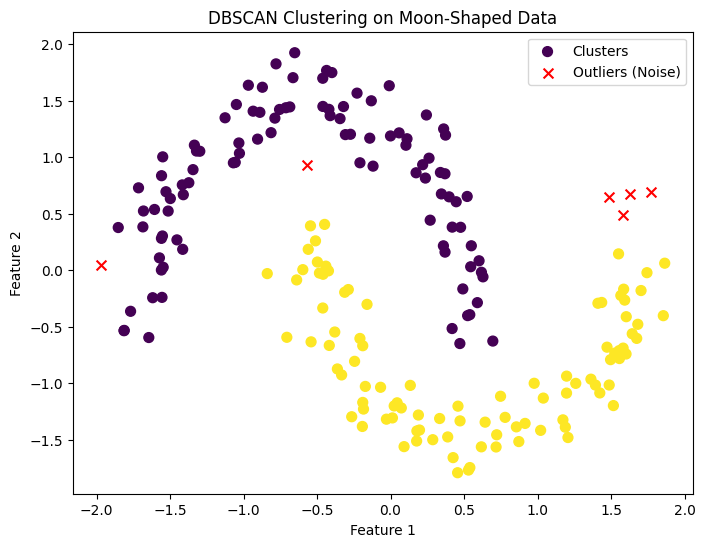

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

# Generate moon-shaped synthetic data
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Identify noise points
noise_points = labels == -1

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[~noise_points, 0], X_scaled[~noise_points, 1],
            c=labels[~noise_points], cmap='viridis', s=50, label='Clusters')
plt.scatter(X_scaled[noise_points, 0], X_scaled[noise_points, 1],
            c='red', s=50, marker='x', label='Outliers (Noise)')

plt.title("DBSCAN Clustering on Moon-Shaped Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


Question 9: Load the Wine dataset, reduce it to 2D using PCA, then apply
Agglomerative Clustering and visualize the result in 2D with a scatter plot.

Answer:

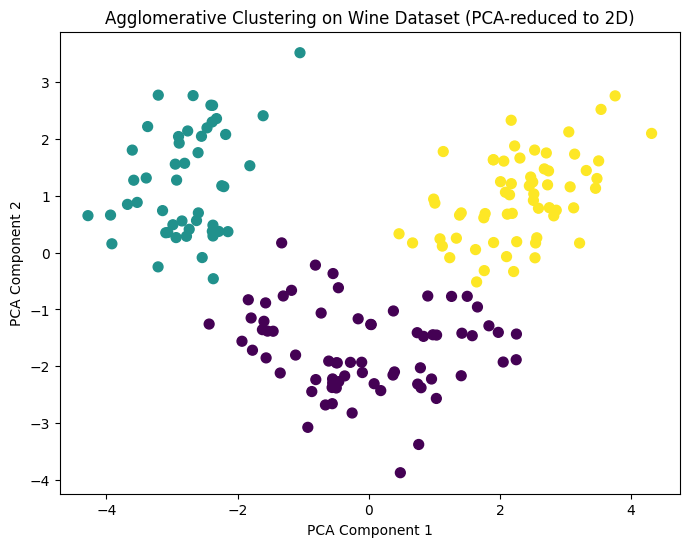

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# Load Wine dataset
wine = load_wine()
X = wine.data

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=3)  # Wine has 3 classes
labels = agg_clust.fit_predict(X_pca)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.title("Agglomerative Clustering on Wine Dataset (PCA-reduced to 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


Question 10: You are working as a data analyst at an e-commerce company. The
marketing team wants to segment customers based on their purchasing behavior to run
targeted promotions. The dataset contains customer demographics and their product
purchase history across categories.
Describe your real-world data science workflow using clustering:
● Which clustering algorithm(s) would you use and why?
● How would you preprocess the data (missing values, scaling)?
● How would you determine the number of clusters?
● How would the marketing team benefit from your clustering analysis?

Answer: Real-World Clustering Workflow for Customer Segmentation
1. Choosing the Clustering Algorithm

K-Means is ideal if we want clear, roughly spherical clusters and know an approximate number of customer groups.

DBSCAN could help identify outlier customers (unusual buying behavior) and clusters of irregular shape.

Hierarchical/Agglomerative Clustering is useful if we want a tree-like view of customer relationships.

In practice, I might start with K-Means and optionally DBSCAN for detecting outliers.

2. Data Preprocessing

Handle missing values: fill numeric columns with mean/median, categorical with mode, or drop rows if sparse.

Encode categorical features: one-hot encoding or ordinal encoding.

Scale features: standardize numeric features (mean=0, std=1) so no feature dominates the clustering.

Optional: reduce dimensions using PCA for high-dimensional data to improve clustering efficiency.

3. Determining the Number of Clusters

Use the Elbow Method to see where adding more clusters gives diminishing returns in K-Means.

Optionally, use Silhouette Score to assess how well-separated clusters are.

4. Business Value

Targeted promotions: send personalized offers to each customer segment.

Product recommendations: understand buying patterns and suggest products for each cluster.

Customer retention: identify high-value or at-risk customers.

Marketing strategy: allocate resources efficiently based on segment size and potential.

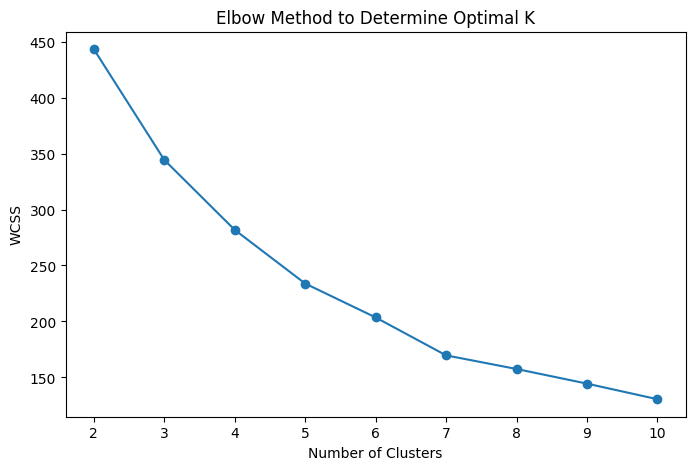

Silhouette Score: 0.26


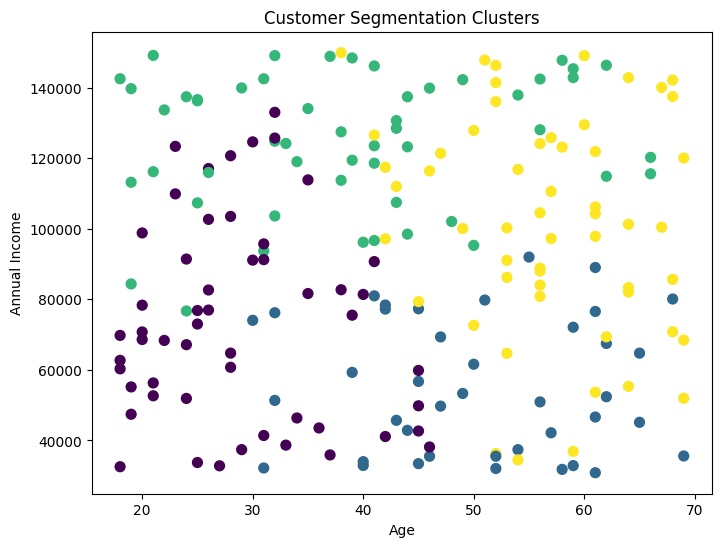

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load dataset (replace with your CSV file)
# df = pd.read_csv("customer_data.csv")

# For demonstration, let's create a sample dataframe
import numpy as np
np.random.seed(42)
df = pd.DataFrame({
    'Age': np.random.randint(18, 70, 200),
    'Annual_Income': np.random.randint(30000, 150000, 200),
    'Spending_Score': np.random.randint(1, 100, 200)
})

# Preprocessing
# Handle missing values (example: fill numeric with median)
df.fillna(df.median(), inplace=True)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Determine optimal number of clusters using Elbow Method
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker='o')
plt.title("Elbow Method to Determine Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

# Apply KMeans with chosen K (example K=4)
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Evaluate cluster quality
score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {score:.2f}")

# Add cluster labels to dataframe
df['Cluster'] = labels

# Visualize clusters (2D using first two features as example)
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Annual_Income'], c=df['Cluster'], cmap='viridis', s=50)
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('Customer Segmentation Clusters')
plt.show()
